In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Audio Files infant cry zip/infant_cry_features.csv")
print(df.head())
print(df.shape)

           0          1           2          3          4          5  \
0 -337.01890  147.11755  -60.189870  -4.827974  33.064880 -26.324774   
1 -309.84174  164.14360  -71.083664   7.232283  15.191280 -37.872486   
2 -339.77173  192.32916 -112.483300  14.755292  43.539436 -45.360730   
3 -242.16618  144.95848  -40.447594   2.563181   1.836039 -41.682953   
4 -402.89820  158.89479  -84.279630  12.229978  20.144924 -39.476566   

           6          7          8          9         10         11  \
0 -15.342424   7.080823 -12.628941  -6.782827  -3.721056 -15.491304   
1  11.541246   0.911335 -30.577930   4.760891  -6.072349 -21.377335   
2  14.444297  18.625914 -29.511936  14.913288  10.061668 -21.227694   
3  -7.852314  -7.839749 -21.903172   3.532650  -6.747611 -15.079595   
4  16.985420   7.547692 -23.176699  13.820542  -7.394139 -24.702223   

          12  label  
0  -4.600354  tired  
1   4.896841  tired  
2  13.372404  tired  
3   6.104044  tired  
4   9.096959  tired  
(880, 14

In [ ]:
print(df.isnull().sum())  # If any column has missing values, handle them


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
label    0
dtype: int64


In [ ]:
# Separate features (X) and labels (y)
X = df.drop(columns=["label"]).values  # Features
y = df["label"].values  # Target variable (Cry type)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converts labels to numbers (0,1,2,...)
print(encoder.classes_)  # Shows the mapping


['belly_pain' 'burping' 'discomfort' 'hungry' 'tired']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale features for better performance


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Train the data using RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators": [100,200,300],
    "max_depth": [10, 15,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)

#Grid Search
grid_search=GridSearchCV(rf_model,param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train, y_train)

#Best model

best_rf=grid_search.best_estimator_


# Predict on test data
y_pred = best_rf.predict(X_test)


**2nd Randomized Search**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter grid with more values
param_grid = {
    "n_estimators": [100, 300, 500, 700],  # More trees for better predictions
    "max_depth": [10, 20, 30, None],  # Allow None to let trees expand fully
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],  # Controls feature subset for diversity
    "bootstrap": [True, False],  # Both sampling methods
    "class_weight": ["balanced", "balanced_subsample"]  # Handles imbalanced data
}

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use RandomizedSearchCV instead of GridSearchCV for efficiency
random_search = RandomizedSearchCV(
    rf_model, param_grid,
    n_iter=20,  # Number of random samples tested
    cv=5, scoring="accuracy",
    random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy * 100:.2f}%")

# Print best hyperparameters
print("Best Parameters:", random_search.best_params_)


Optimized Random Forest Accuracy: 77.84%
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.75


**3rd Randomized Search**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Fine-tuned parameter grid
param_grid = {
    "n_estimators": [500, 700, 1000],  # Increase trees for better learning
    "max_depth": [30, 50, None],  # Deeper trees capture more patterns
    "min_samples_split": [2, 3, 5],  # Allow deeper splits
    "min_samples_leaf": [1, 2],  # Reduce minimum leaf size
    "max_features": [None],  # Use all features
    "bootstrap": [False],  # Train on full dataset
    "class_weight": ["balanced_subsample"]  # Handles class imbalance better
}

# Initialize model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    rf_model, param_grid,
    n_iter=15,  # Reduce iterations to focus on best configs
    cv=5, scoring="accuracy",
    random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy * 100:.2f}%")

# Print best hyperparameters
print("Best Parameters:", random_search.best_params_)



Optimized Random Forest Accuracy: 53.98%
Best Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50, 'class_weight': 'balanced_subsample', 'bootstrap': False}


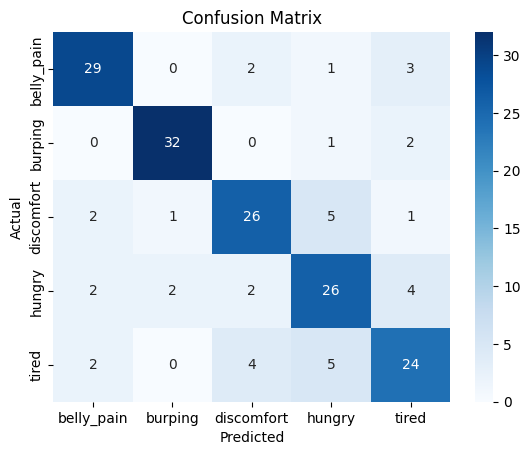

              precision    recall  f1-score   support

  belly_pain       0.83      0.83      0.83        35
     burping       0.91      0.91      0.91        35
  discomfort       0.76      0.74      0.75        35
      hungry       0.68      0.72      0.70        36
       tired       0.71      0.69      0.70        35

    accuracy                           0.78       176
   macro avg       0.78      0.78      0.78       176
weighted avg       0.78      0.78      0.78       176



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


**Train Using SVC model**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf",probability=True,random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Accuracy: {accuracy:.2f}")

Support Vector Accuracy: 0.71


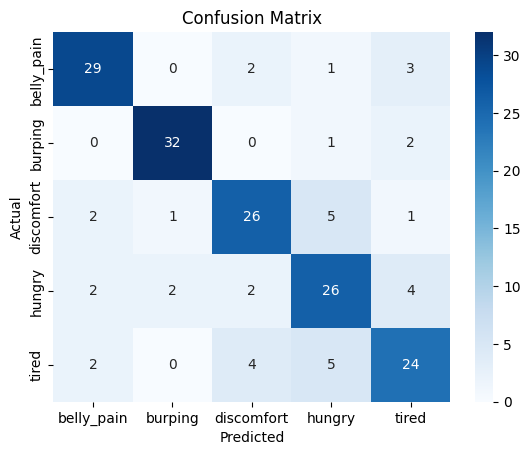

              precision    recall  f1-score   support

  belly_pain       0.69      0.71      0.70        35
     burping       0.88      0.83      0.85        35
  discomfort       0.68      0.74      0.71        35
      hungry       0.66      0.75      0.70        36
       tired       0.64      0.51      0.57        35

    accuracy                           0.71       176
   macro avg       0.71      0.71      0.71       176
weighted avg       0.71      0.71      0.71       176



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_svm, target_names=encoder.classes_))


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="entropy",max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Decision Tree Accuracy: 53.41%

Classification Report:
              precision    recall  f1-score   support

  belly_pain       0.69      0.57      0.62        35
     burping       0.70      0.60      0.65        35
  discomfort       0.55      0.51      0.53        35
      hungry       0.54      0.56      0.55        36
       tired       0.32      0.43      0.37        35

    accuracy                           0.53       176
   macro avg       0.56      0.53      0.54       176
weighted avg       0.56      0.53      0.54       176



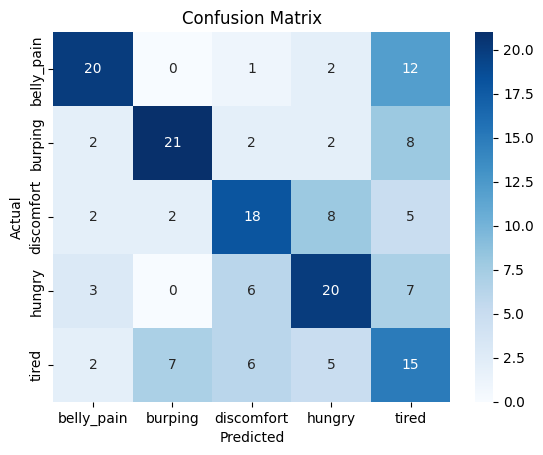

              precision    recall  f1-score   support

  belly_pain       0.69      0.57      0.62        35
     burping       0.70      0.60      0.65        35
  discomfort       0.55      0.51      0.53        35
      hungry       0.54      0.56      0.55        36
       tired       0.32      0.43      0.37        35

    accuracy                           0.53       176
   macro avg       0.56      0.53      0.54       176
weighted avg       0.56      0.53      0.54       176



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


**XGBoost  Classifier**

In [ ]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(n_estimators=190,max_depth=8,learning_rate=0.2,use_label_encoder=False,eval_metric="mlogloss")
xgb_model.fit(X_train,y_train)

y_pred=xgb_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(f"XGBoost Acccuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:27:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Acccuracy: 74.43%


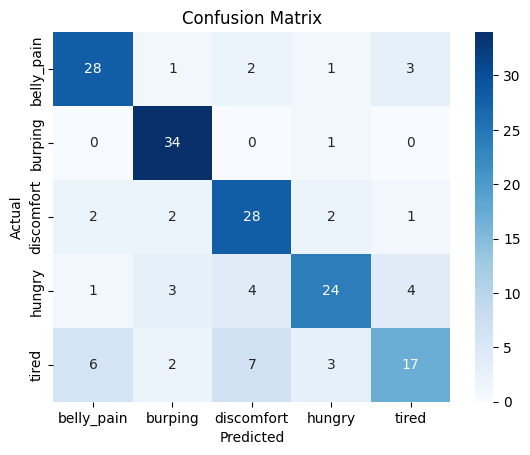

              precision    recall  f1-score   support

  belly_pain       0.76      0.80      0.78        35
     burping       0.81      0.97      0.88        35
  discomfort       0.68      0.80      0.74        35
      hungry       0.77      0.67      0.72        36
       tired       0.68      0.49      0.57        35

    accuracy                           0.74       176
   macro avg       0.74      0.74      0.74       176
weighted avg       0.74      0.74      0.74       176



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


**Stacking Classifier  1**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42)),
    ("dt", DecisionTreeClassifier(max_depth=5, random_state=42)),
    ("xgb", XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="mlogloss"))
]

# Define meta-learner (Logistic Regression)
meta_learner = LogisticRegression()

# Create Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, stack_method="auto")

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Accuracy: 75.57%


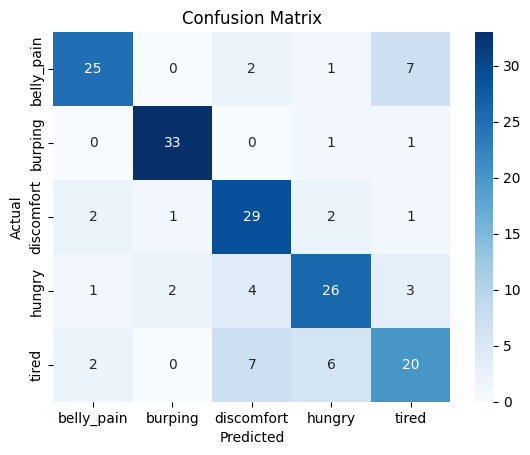

              precision    recall  f1-score   support

  belly_pain       0.83      0.71      0.77        35
     burping       0.92      0.94      0.93        35
  discomfort       0.69      0.83      0.75        35
      hungry       0.72      0.72      0.72        36
       tired       0.62      0.57      0.60        35

    accuracy                           0.76       176
   macro avg       0.76      0.76      0.75       176
weighted avg       0.76      0.76      0.75       176



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load CSV file
df = pd.read_csv("/content/drive/MyDrive/Audio Files infant cry zip/infant_cry_features.csv")

# Separate features & labels
X = df.drop(columns=["label"]).values  # Feature values
y = df["label"].astype("category").cat.codes  # Convert labels to numeric

# One-hot encode labels
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data shape:", X_train.shape, y_train.shape)


Data shape: (704, 13) (704, 5)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/Audio Files infant cry zip/infant_cry_features.csv")

# Convert categorical labels to numerical codes
df["label"] = df["label"].astype("category").cat.codes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = tf.keras.utils.to_categorical(df["label"], num_classes=len(df["label"].unique()))

# Reshape features for Conv1D (CNN needs 3D input: samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Define CNN + LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),

    # CNN Layers
    Conv1D(64, kernel_size=3, activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # LSTM Layer
    LSTM(64, return_sequences=True),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.3),

    # Fully Connected Layers
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(y_train.shape[1], activation="softmax")
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Learning rate scheduling and early stopping
callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1),
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True, verbose=1)
]

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


Training data shape: (704, 13, 1) (704, 5)
Testing data shape: (176, 13, 1) (176, 5)
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 145ms/step - accuracy: 0.2329 - loss: 1.5867 - val_accuracy: 0.2216 - val_loss: 1.5847 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3904 - loss: 1.4948 - val_accuracy: 0.2330 - val_loss: 1.5771 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4447 - loss: 1.3802 - val_accuracy: 0.2500 - val_loss: 1.6301 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4826 - loss: 1.2998 - val_accuracy: 0.2443 - val_loss: 1.6674 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4746 - loss: 1.2619 - val_accuracy: 0.2614 - val_loss: 1.6697 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5373 - loss: 1.1981 - val_accuracy: 0.3011 - val_loss: 1.6022 - learning_rate: 0.0010
E

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


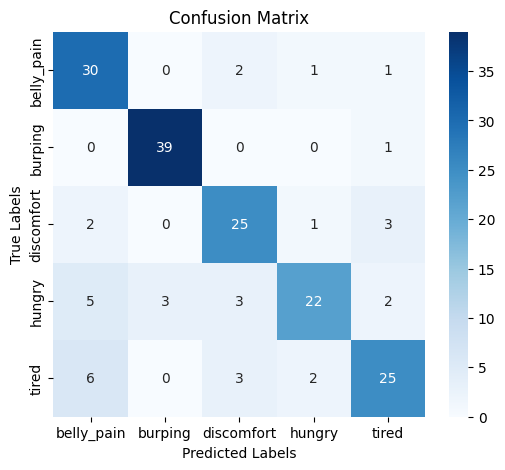

Classification Report:
               precision    recall  f1-score   support

  belly_pain       0.70      0.88      0.78        34
     burping       0.93      0.97      0.95        40
  discomfort       0.76      0.81      0.78        31
      hungry       0.85      0.63      0.72        35
       tired       0.78      0.69      0.74        36

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.79       176
weighted avg       0.81      0.80      0.80       176



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions (convert probabilities to class indices)
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df["label"].astype("category").cat.categories,
            yticklabels=df["label"].astype("category").cat.categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Extract category labels before encoding
label_names = df["label"].astype("category").cat.categories.tolist()

# Print classification report with correct target names
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_names))


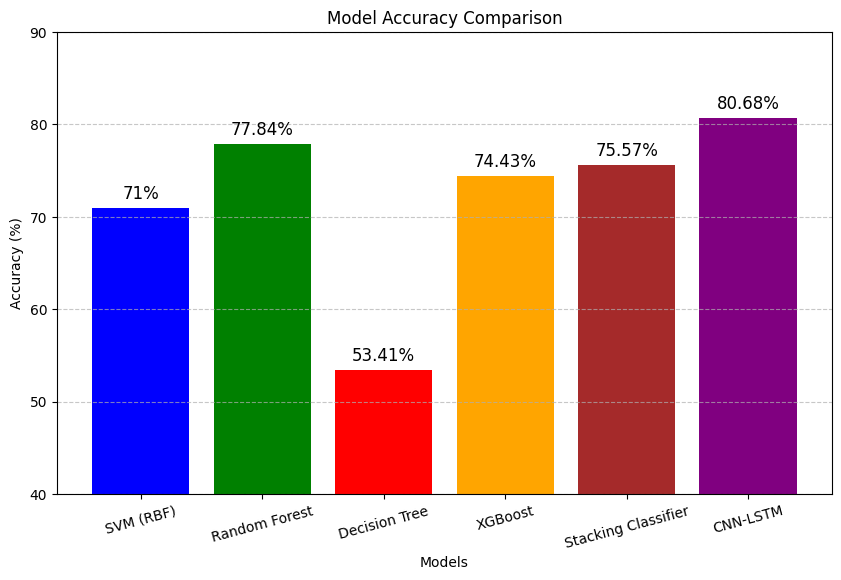

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracies
models = ["SVM (RBF)", "Random Forest", "Decision Tree", "XGBoost", "Stacking Classifier", "CNN-LSTM"]
accuracies = [71, 77.84, 53.41, 74.43, 75.57, 80.68]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'brown', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(40, 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc}%", ha='center', fontsize=12)

plt.xticks(rotation=15)  # Rotate model names for better readability
plt.show()


In [ ]:
print("Shape of y_test:", y_test.shape)


Shape of y_test: (176,)
